In [1]:
from typing import Optional
import argparse
import os

import torch
import matplotlib.pyplot as plt     # type: ignore

import utilities
import model
import optimize

import numpy as np

import collections.abc as container_abcs

In [14]:
from utils import coco_utils, nsd_utils

Initializing coco api...
loading annotations into memory...
Done (t=0.65s)
creating index...
index created!
loading annotations into memory...
Done (t=16.49s)
creating index...
index created!
Initializing coco api...
loading annotations into memory...
Done (t=0.43s)
creating index...
index created!
loading annotations into memory...
Done (t=14.60s)
creating index...
index created!


In [18]:
subject=999
subject_df = coco_utils.load_indep_coco_info()  

n_ims_do = 20;

for ii in range(n_ims_do):
    
    target_image_filename = subject_df['filename_raw'].iloc[ii]
    
    name = target_image_filename.split('/')[-1].split('.')[0]
    print(name)


loading image info from /user_data/mmhender/nsd/stimuli/Indep_set_info.csv

000000326021
000000233553
000000017985
000000211725
000000421287
000000537376
000000194056
000000446726
000000096496
000000275412
000000569827
000000502510
000000155126
000000144633
000000338067
000000209279
000000497894
000000099030
000000111842
000000179687


In [2]:
# from utils import default_paths, coco_utils, nsd_utils
# from utils import segmentation_utils
# subject=999
# subject_df = coco_utils.load_indep_coco_info()     
# info_df = subject_df

In [2]:
# ii=230;
# cocoim_raw = info_df['filename_raw'].iloc[ii]
# target_image_filename = cocoim_raw

target_image_filename = '/lab_data/tarrlab/common/datasets/COCO/train2017/000000161251.jpg'
name = target_image_filename.split('/')[-1].split('.')[0]
name

'000000161251'

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

root = os.getcwd()
out_dir = os.path.join(root, 'synth_images', '%s'%name)
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    

cuda


In [4]:
model_path = os.path.join(root, 'models','VGG19_normalized_avg_pool_pytorch')

In [5]:
class a():
    def __init__(self, checkpoint_every=1, n_steps=100, max_iter=200, lr = 1.0, rndseed=None):
        self.checkpoint_every = checkpoint_every
        self.n_steps = n_steps
        self.max_iter = max_iter
        self.lr = lr
        self.rndseed = rndseed
        

In [6]:
args = a(checkpoint_every=1, n_steps=2, max_iter=200, lr = 1.0, rndseed = 854485)

In [7]:
# load model & data
target_image = utilities.preprocess_image(
    utilities.load_image(target_image_filename)
)

Text(0.5, 1.0, 'target')

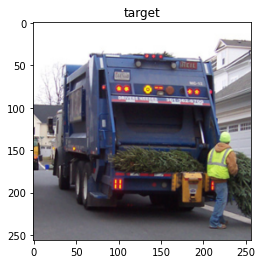

In [8]:
target_im_plot = utilities.preprocess_image_simple(utilities.load_image(target_image_filename))

plt.figure(figsize=(4,4))
plt.imshow(target_im_plot)
plt.title('target')

In [9]:
important_layers = ['relu1_1', 'pool1','pool2','pool3','pool4']

# for ll in [0]:
for ll in [3]:
# for ll in range(len(important_layers)):

    
    layers_match = important_layers[0:ll+1]
    print(layers_match)
    
    net = model.Model(model_path, device, target_image, important_layers=layers_match)

    # synthesize
    optimizer = optimize.Optimizer(net, args)
    result = optimizer.optimize()

    # save result
    final_image = utilities.postprocess_image(
        result, utilities.load_image(target_image_filename)
    )
    filename_save = os.path.join(out_dir, 'upto_%s.png'%important_layers[ll])
    print('saving image to %s'%filename_save)
    final_image.save(filename_save)


['relu1_1', 'pool1', 'pool2', 'pool3']
step: 1, loss: 222598.4375 (5.64s)
step: 2, loss: 85061.390625 (5.65s)
saving image to /user_data/mmhender/toolboxes/texture-synthesis-pytorch/synth_images/000000161251/upto_pool3.png


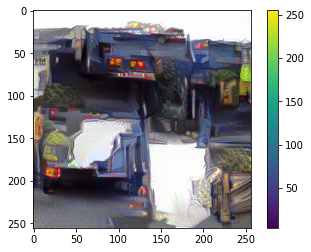

In [35]:
plt.figure()
plt.imshow(final_image)
plt.colorbar()

Text(0, 0.5, 'loss')

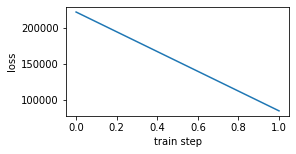

In [10]:
plt.figure(figsize=(4,2))
plt.plot(np.arange(optimizer.n_steps),optimizer.losses)
plt.xlabel('train step')
plt.ylabel('loss')

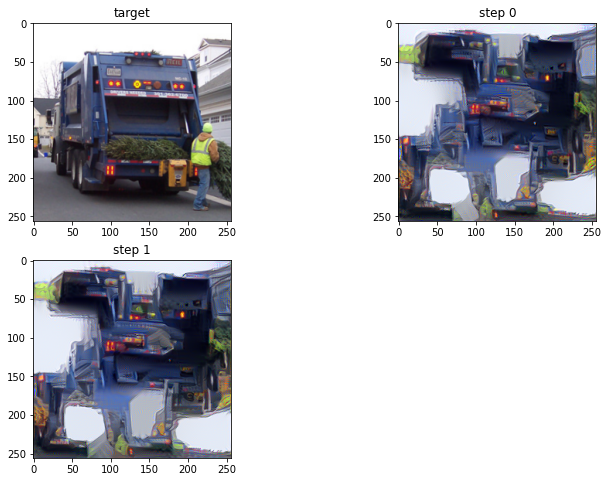

In [13]:
steps_plot = np.floor(np.linspace(0,optimizer.n_steps-1,np.min([optimizer.n_steps, 5]))).astype(int)
steps_plot

npx = int(np.ceil(np.sqrt(len(steps_plot)+1)))
npy = int(np.ceil((len(steps_plot)+1)/npx))

target_im_plot = utilities.preprocess_image_simple(utilities.load_image(target_image_filename), new_size=256)

plt.figure(figsize=(12,8))

plt.subplot(npy, npx,1)
plt.imshow(target_im_plot)
plt.title('target')

for ii, step in enumerate(steps_plot):
    
    opt_image = optimizer.opt_images[step]
    
    plt.subplot(npy, npx, ii+2)
    plt.imshow(opt_image)
    plt.title('step %d'%step)
  